<center><h1 class="list-group-item list-group-item-success">Importing Libraries</h1></center>

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# feature extractoring and preprocessing data
import librosa
import os
import pandas as pd
import numpy as np
import csv
import random
# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
import pickle
from sklearn.preprocessing import StandardScaler
# Result Analysis
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
#for graph
import matplotlib.pyplot as plt
%matplotlib inline
# from lib_file import lib_path
import seaborn as sns

SEED = 42
random.seed(SEED)
np.random.seed(SEED)

In [3]:
# os.listdir('input/genres/')

# List directory contents
genres = os.listdir('input/genres_3/')

# Sort the list in proper numerical order
genres_sorted = sorted(genres, key=lambda x: int(x[1:]))

# Print the sorted list
print(genres_sorted)

['M51', 'M52', 'M53', 'M54', 'M55', 'M56', 'M57', 'M58', 'M59', 'M60', 'M61', 'M62', 'M63', 'M64', 'M65', 'M66', 'M67', 'M68', 'M69', 'M70', 'M71', 'M72']


In [4]:
header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()

In [5]:
print(header)

['filename', 'chroma_stft', 'rmse', 'spectral_centroid', 'spectral_bandwidth', 'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20', 'label']


<center><h1 class="list-group-item list-group-item-success">Converting Audio data into Numerical data</h1></center>

In [6]:
# Write the header to the CSV file
file_path = 'NumericalAudioData_3.csv'
try:
    with open(file_path, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(header)
except IOError as e:
    print(f"Error opening or writing to file: {e}")

# List of genres
# genres = 'M1 M2 M3 M4 M5 M6 M7 M8 M9 M10 M11 M12 M13 M14 M15 M16 M17 M18 M19 M20 M21 M22 M23 M24 M25 M26 M27 M28 M29 M30 M31 M32 M33 M34 M35 M36 M37 M38 M39 M40 M41 M42 M43 M44 M45 M46 M47 M48 M49 M50 M51 M52 M53 M54 M55 M56 M57 M58 M59 M60 M61 M62 M63 M64 M65 M66 M67 M68 M69 M70 M71 M72'.split()

genres = 'M51 M52 M53 54 M55 M56 M57 M58 M59 M60 M61 M62 M63 M64 M65 M66 M67 M68 M69 M70 M71 M72'.split()

print("genres:", genres)

# Process each genre and each file in the genre
for g in genres:
    genre_path = f'input/genres_3/{g}'
    if not os.path.isdir(genre_path):
        print(f"Directory not found: {genre_path}")
        continue
    
    for filename in os.listdir(genre_path):
        songname = os.path.join(genre_path, filename)
        print("songname:", songname)
        
        try:
            # Load the audio file
            y, sr = librosa.load(songname, mono=True, duration=30)
            
            # Extract features
            chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
            rmse = librosa.feature.rms(y=y)
            spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
            spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
            rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
            zcr = librosa.feature.zero_crossing_rate(y)
            mfcc = librosa.feature.mfcc(y=y, sr=sr)
            
            # Prepare the row to append
            to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'
            for e in mfcc:
                to_append += f' {np.mean(e)}'
            to_append += f' {g}'
            
            # Append the row to the CSV file
            try:
                with open(file_path, 'a', newline='') as file:
                    writer = csv.writer(file)
                    writer.writerow(to_append.split())
            except IOError as e:
                print(f"Error appending to file: {e}")
        
        except Exception as e:
            print(f"Error processing file {songname}: {e}")

print("Processing complete.")


genres: ['M51', 'M52', 'M53', '54', 'M55', 'M56', 'M57', 'M58', 'M59', 'M60', 'M61', 'M62', 'M63', 'M64', 'M65', 'M66', 'M67', 'M68', 'M69', 'M70', 'M71', 'M72']
songname: input/genres_3/M51\M51(1).wav
songname: input/genres_3/M51\M51(2).wav
songname: input/genres_3/M51\M51(3).wav
songname: input/genres_3/M51\M51(4).wav
songname: input/genres_3/M51\M51(5).wav
songname: input/genres_3/M51\M51(6).wav
songname: input/genres_3/M51\M51(7).wav
songname: input/genres_3/M51\M51(8).wav
songname: input/genres_3/M51\M51(9).wav
songname: input/genres_3/M52\M52(1).wav
songname: input/genres_3/M52\M52(2).wav
songname: input/genres_3/M52\M52(3).wav
songname: input/genres_3/M52\M52(4).wav
songname: input/genres_3/M52\M52(5).wav
songname: input/genres_3/M52\M52(6).wav
songname: input/genres_3/M52\M52(7).wav
songname: input/genres_3/M52\M52(8).wav
songname: input/genres_3/M52\M52(9).wav
songname: input/genres_3/M53\M53(1).wav
songname: input/genres_3/M53\M53(10).wav
songname: input/genres_3/M53\M53(11).

songname: input/genres_3/M71\M71(2).wav
songname: input/genres_3/M71\M71(3).wav
songname: input/genres_3/M71\M71(4).wav
songname: input/genres_3/M71\M71(5).wav
songname: input/genres_3/M71\M71(6).wav
songname: input/genres_3/M71\M71(7).wav
songname: input/genres_3/M71\M71(8).wav
songname: input/genres_3/M71\M71(9).wav
songname: input/genres_3/M72\M72(1).wav
songname: input/genres_3/M72\M72(10).wav
songname: input/genres_3/M72\M72(11).wav
songname: input/genres_3/M72\M72(2).wav
songname: input/genres_3/M72\M72(3).wav
songname: input/genres_3/M72\M72(4).wav
songname: input/genres_3/M72\M72(5).wav
songname: input/genres_3/M72\M72(6).wav
songname: input/genres_3/M72\M72(7).wav
songname: input/genres_3/M72\M72(8).wav
songname: input/genres_3/M72\M72(9).wav
Processing complete.


<center><h1 class="list-group-item list-group-item-success">Loading Numerical Data</h1></center>

In [7]:
data = pd.read_csv(filepath_or_buffer='NumericalAudioData_3.csv')
data.head()

filename  chroma_stft      rmse  spectral_centroid  spectral_bandwidth  \
0  M51(1).wav     0.277491  0.254520        1639.034271         1708.433567   
1  M51(2).wav     0.153697  0.204620         786.376628         1050.532727   
2  M51(3).wav     0.275485  0.137961        1709.587866         1553.591137   
3  M51(4).wav     0.299561  0.158626        1249.089570         1401.141068   
4  M51(5).wav     0.226634  0.115818        1332.743203         1625.088377   

       rolloff  zero_crossing_rate       mfcc1       mfcc2      mfcc3  ...  \
0  2771.424908            0.093599 -114.227570  106.043610 -31.773666  ...   
1  1400.266533            0.047621 -251.429657  118.927658  13.632360  ...   
2  3221.155522            0.083522 -137.649551  127.578201 -68.019646  ...   
3  2641.334028            0.057664 -159.582123  153.061218 -35.904072  ...   
4  2622.050811            0.055901 -223.182755  128.507843 -25.462246  ...   

     mfcc12     mfcc13    mfcc14    mfcc15    mfcc16     mfcc17     mfcc18  \
0  3.103702  -3.552407  2.293973 -7.626280  4.021794  -8.256055   3.117887   
1  4.360221   1.397386  3.780654 -4.334933 -6.729749 -12.248677 -10.591938   
2  0.925642 -11.428097 -8.425349  0.746118 -3.657809 -18.116060   2.360342   
3 -0.294296  -7.083318 -1.841344  2.162676 -4.103367  -8.552576   4.492152   
4 -3.404955  -6.835197  1.763623 -1.042845  3.685899   2.332833   4.369822   

     mfcc19    mfcc20  label  
0 -0.914846  2.761095    M51  
1  0.970735  8.234140    M51  
2 -3.233397 -8.824240    M51  
3 -8.506518  2.185754    M51  
4  1.849784 -1.577872    M51  

[5 rows x 28 columns]

In [8]:
print(data.shape)

(219, 28)


In [9]:
data["label"].value_counts()

M70    13
M68    13
M62    11
M59    11
M66    11
M61    11
M60    11
M72    11
M56    11
M53    11
M57    10
M63    10
M64    10
M65    10
M55    10
M71    10
M58     9
M52     9
M67     9
M69     9
M51     9
Name: label, dtype: int64

<center><h1 class="list-group-item list-group-item-success"> Data Visualization</h1></center>

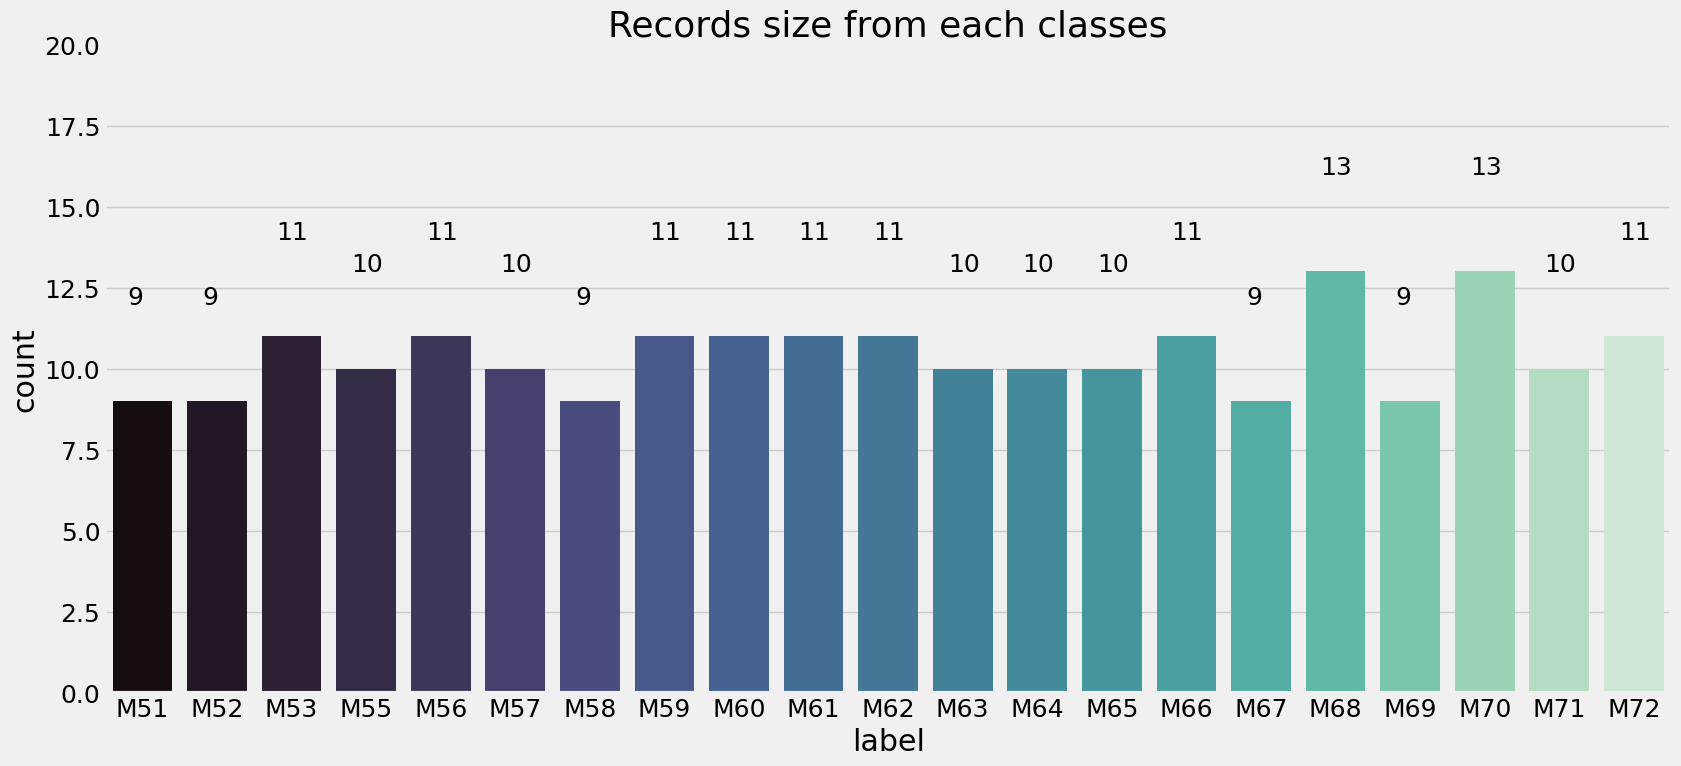

In [10]:
with plt.style.context(style="fivethirtyeight"):
    plt.figure(figsize=(18,8))
    plt.rcParams["font.size"]=18
    ax=sns.countplot(x="label",data=data, palette="mako")
    plt.title(label="Records size from each classes")
    plt.ylim(0,20)
    for p in ax.patches:
        ax.annotate((p.get_height()),(p.get_x()+0.20,p.get_height()+3))
    plt.show()

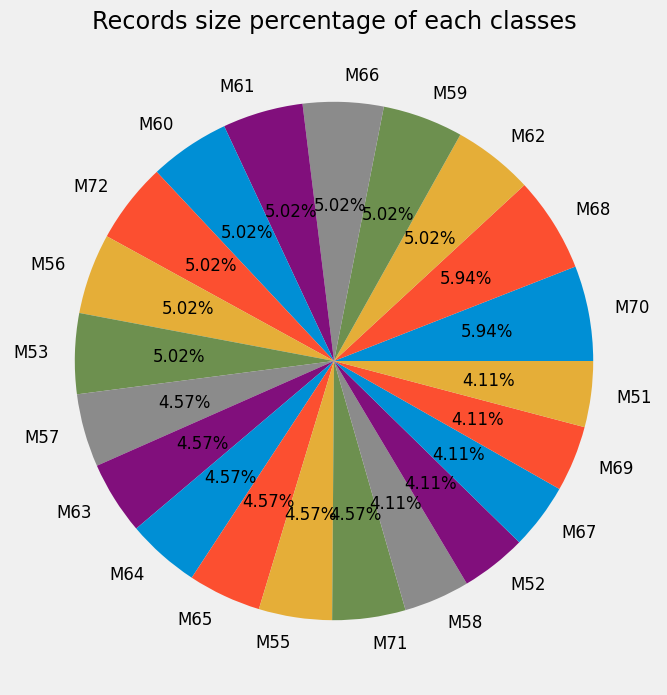

In [11]:
chart_data = dict(data['label'].value_counts())

with plt.style.context(style="fivethirtyeight"):
    plt.figure(figsize=(18,8))
    plt.rcParams["font.size"]=12
    plt.pie(x=chart_data.values(), labels=chart_data.keys(), autopct="%.2f%%")
    plt.title(label="Records size percentage of each classes")
    plt.show()

In [12]:
# Dropping unneccesary columns
data = data.drop(['filename'],axis=1)

In [13]:
data.shape

(219, 27)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   chroma_stft         219 non-null    float64
 1   rmse                219 non-null    float64
 2   spectral_centroid   219 non-null    float64
 3   spectral_bandwidth  219 non-null    float64
 4   rolloff             219 non-null    float64
 5   zero_crossing_rate  219 non-null    float64
 6   mfcc1               219 non-null    float64
 7   mfcc2               219 non-null    float64
 8   mfcc3               219 non-null    float64
 9   mfcc4               219 non-null    float64
 10  mfcc5               219 non-null    float64
 11  mfcc6               219 non-null    float64
 12  mfcc7               219 non-null    float64
 13  mfcc8               219 non-null    float64
 14  mfcc9               219 non-null    float64
 15  mfcc10              219 non-null    float64
 16  mfcc11  

In [15]:
data.head()

chroma_stft      rmse  spectral_centroid  spectral_bandwidth      rolloff  \
0     0.277491  0.254520        1639.034271         1708.433567  2771.424908   
1     0.153697  0.204620         786.376628         1050.532727  1400.266533   
2     0.275485  0.137961        1709.587866         1553.591137  3221.155522   
3     0.299561  0.158626        1249.089570         1401.141068  2641.334028   
4     0.226634  0.115818        1332.743203         1625.088377  2622.050811   

   zero_crossing_rate       mfcc1       mfcc2      mfcc3      mfcc4  ...  \
0            0.093599 -114.227570  106.043610 -31.773666  -3.046045  ...   
1            0.047621 -251.429657  118.927658  13.632360  30.411224  ...   
2            0.083522 -137.649551  127.578201 -68.019646  28.050280  ...   
3            0.057664 -159.582123  153.061218 -35.904072  58.917534  ...   
4            0.055901 -223.182755  128.507843 -25.462246  37.911739  ...   

     mfcc12     mfcc13    mfcc14    mfcc15    mfcc16     mfcc17     mfcc18  \
0  3.103702  -3.552407  2.293973 -7.626280  4.021794  -8.256055   3.117887   
1  4.360221   1.397386  3.780654 -4.334933 -6.729749 -12.248677 -10.591938   
2  0.925642 -11.428097 -8.425349  0.746118 -3.657809 -18.116060   2.360342   
3 -0.294296  -7.083318 -1.841344  2.162676 -4.103367  -8.552576   4.492152   
4 -3.404955  -6.835197  1.763623 -1.042845  3.685899   2.332833   4.369822   

     mfcc19    mfcc20  label  
0 -0.914846  2.761095    M51  
1  0.970735  8.234140    M51  
2 -3.233397 -8.824240    M51  
3 -8.506518  2.185754    M51  
4  1.849784 -1.577872    M51  

[5 rows x 27 columns]

In [16]:
class_labels = data["label"].unique().tolist()
class_labels.sort()

print(class_labels)

['M51', 'M52', 'M53', 'M55', 'M56', 'M57', 'M58', 'M59', 'M60', 'M61', 'M62', 'M63', 'M64', 'M65', 'M66', 'M67', 'M68', 'M69', 'M70', 'M71', 'M72']


In [17]:
oversampled = []

for label in class_labels:
    label_df = data.loc[data["label"] == label]
    oversampled_df = resample(label_df, n_samples=100)
    oversampled.append(oversampled_df)
    
df = pd.concat(objs=oversampled, ignore_index=True)
df = df.sample(frac=1).reset_index(drop=True)

df.head()

chroma_stft      rmse  spectral_centroid  spectral_bandwidth      rolloff  \
0     0.284881  0.063141        1561.403517         1734.278691  3196.414005   
1     0.269290  0.008695        1766.073362         1588.947510  3102.206241   
2     0.299561  0.158626        1249.089570         1401.141068  2641.334028   
3     0.359049  0.092877        2184.002022         1502.794310  3432.804242   
4     0.279520  0.069893        1764.573478         1921.781388  3251.880336   

   zero_crossing_rate       mfcc1       mfcc2      mfcc3      mfcc4  ...  \
0            0.068357 -221.499496  118.581802 -22.654684  29.464396  ...   
1            0.102144 -408.949097  106.425865 -51.847317  29.865652  ...   
2            0.057664 -159.582123  153.061218 -35.904072  58.917534  ...   
3            0.176271 -153.816711  118.968460 -88.524818  32.862175  ...   
4            0.086333 -263.202972  107.893120  -9.795880  -7.681393  ...   

     mfcc12     mfcc13     mfcc14     mfcc15     mfcc16     mfcc17    mfcc18  \
0  1.688656  -9.224873  -0.663389  -3.950355   3.106754  -3.938854 -0.540016   
1 -1.910222  -2.806368  -2.905803 -12.358733  -6.483253  -6.423399 -1.403102   
2 -0.294296  -7.083318  -1.841344   2.162676  -4.103367  -8.552576  4.492152   
3  2.098787  -2.817688  10.799505  -9.206716  19.874443 -20.360823  5.563540   
4 -8.411554 -12.535661  -5.012262  -2.575042  -0.252053 -10.627454 -4.395062   

      mfcc19    mfcc20  label  
0  -4.202621  1.490016    M58  
1  -4.009223  3.784072    M61  
2  -8.506518  2.185754    M51  
3 -13.192147 -5.453015    M51  
4  -7.238639  4.217274    M61  

[5 rows x 27 columns]

In [18]:
df.shape

(2100, 27)

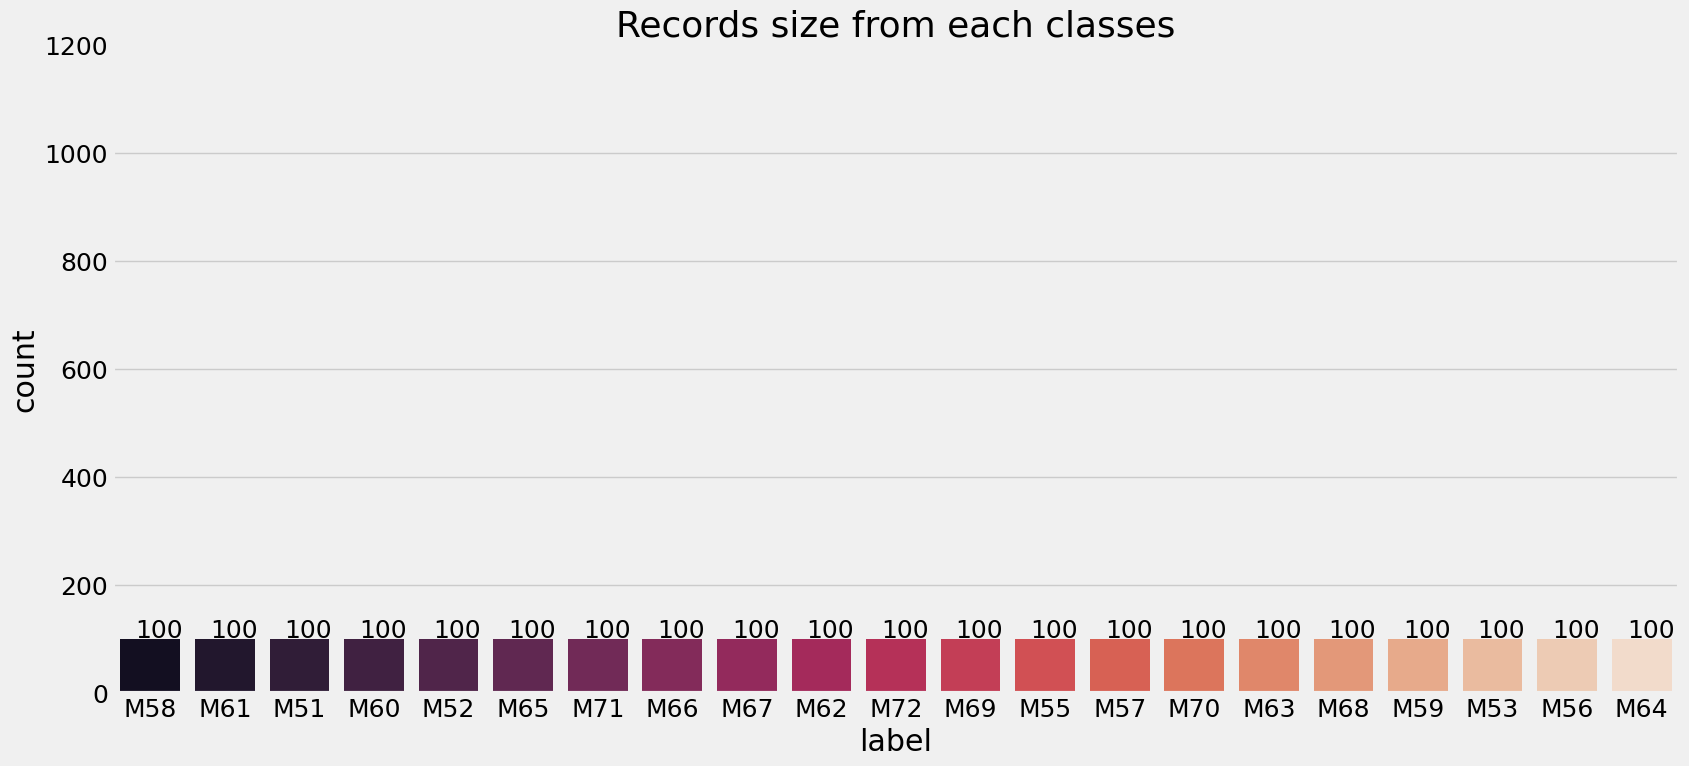

In [19]:
with plt.style.context(style="fivethirtyeight"):
    plt.figure(figsize=(18,8))
    plt.rcParams["font.size"]=18
    ax=sns.countplot(x="label",data=df, palette="rocket")
    plt.title(label="Records size from each classes")
    plt.ylim(0,1200)
    for p in ax.patches:
        ax.annotate((p.get_height()),(p.get_x()+0.20,p.get_height()+3))
    plt.show()

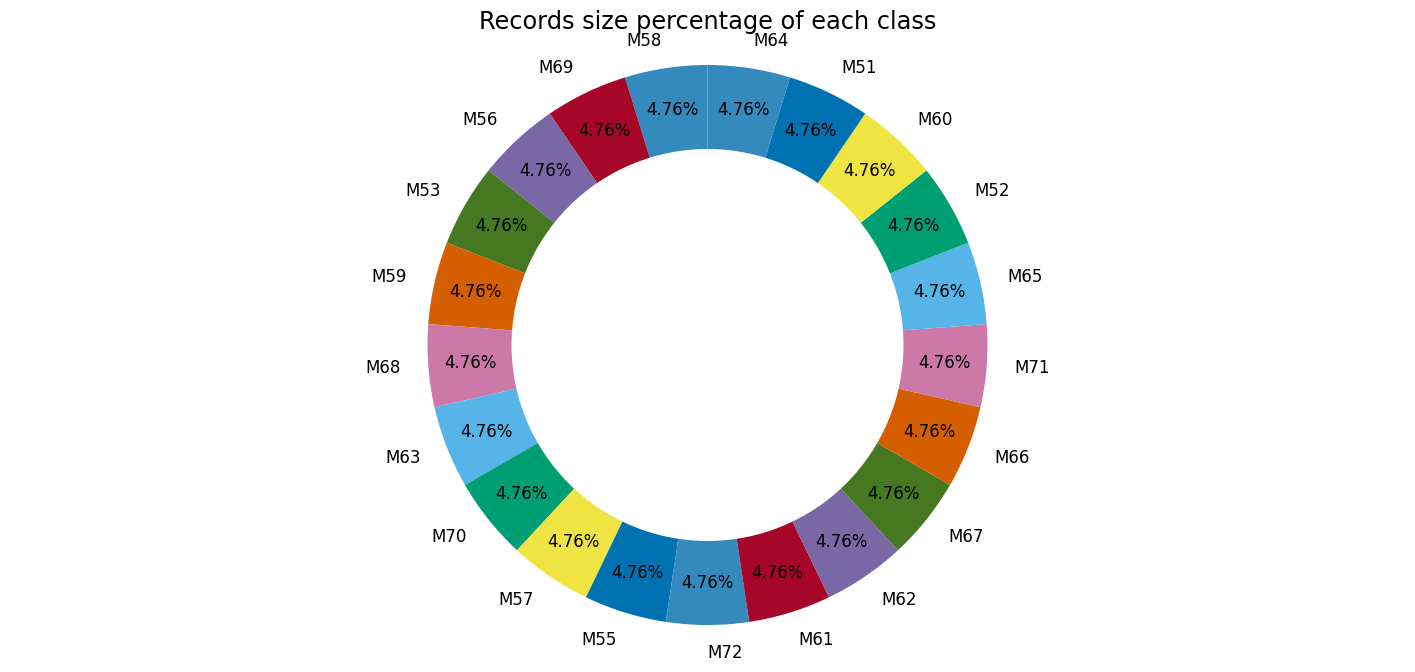

In [20]:
chart_data = dict(df['label'].value_counts())

with plt.style.context(style="bmh"):
    plt.figure(figsize=(18, 8))
    plt.rcParams["font.size"] = 12
    plt.pie(x=chart_data.values(), labels=chart_data.keys(), autopct="%.2f%%", startangle=90, pctdistance=0.85)
    centre_circle = plt.Circle((0, 0), 0.70, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.axis('equal')
    plt.title(label="Records size percentage of each class")
    plt.show()

In [21]:
X = df.drop(labels="label", axis=1)
X.head()

chroma_stft      rmse  spectral_centroid  spectral_bandwidth      rolloff  \
0     0.284881  0.063141        1561.403517         1734.278691  3196.414005   
1     0.269290  0.008695        1766.073362         1588.947510  3102.206241   
2     0.299561  0.158626        1249.089570         1401.141068  2641.334028   
3     0.359049  0.092877        2184.002022         1502.794310  3432.804242   
4     0.279520  0.069893        1764.573478         1921.781388  3251.880336   

   zero_crossing_rate       mfcc1       mfcc2      mfcc3      mfcc4  ...  \
0            0.068357 -221.499496  118.581802 -22.654684  29.464396  ...   
1            0.102144 -408.949097  106.425865 -51.847317  29.865652  ...   
2            0.057664 -159.582123  153.061218 -35.904072  58.917534  ...   
3            0.176271 -153.816711  118.968460 -88.524818  32.862175  ...   
4            0.086333 -263.202972  107.893120  -9.795880  -7.681393  ...   

      mfcc11    mfcc12     mfcc13     mfcc14     mfcc15     mfcc16     mfcc17  \
0  -7.739633  1.688656  -9.224873  -0.663389  -3.950355   3.106754  -3.938854   
1 -11.300858 -1.910222  -2.806368  -2.905803 -12.358733  -6.483253  -6.423399   
2 -11.472236 -0.294296  -7.083318  -1.841344   2.162676  -4.103367  -8.552576   
3  -3.648076  2.098787  -2.817688  10.799505  -9.206716  19.874443 -20.360823   
4  -4.618489 -8.411554 -12.535661  -5.012262  -2.575042  -0.252053 -10.627454   

     mfcc18     mfcc19    mfcc20  
0 -0.540016  -4.202621  1.490016  
1 -1.403102  -4.009223  3.784072  
2  4.492152  -8.506518  2.185754  
3  5.563540 -13.192147 -5.453015  
4 -4.395062  -7.238639  4.217274  

[5 rows x 26 columns]

In [22]:
y = df[["label"]]
y.head(10)

label
0   M58
1   M61
2   M51
3   M51
4   M61
5   M60
6   M52
7   M65
8   M71
9   M66

In [23]:
scaler = StandardScaler()
scaler = scaler.fit(X.values)
scaled_X = scaler.transform(X.values)

df = pd.DataFrame(scaled_X, columns=X.columns)
df['label'] = y.values.ravel()

df.head()

chroma_stft      rmse  spectral_centroid  spectral_bandwidth   rolloff  \
0     0.571062 -0.513216          -0.203429            0.128607  0.020990   
1     0.309144 -1.215483           0.178568           -0.199123 -0.064141   
2     0.817691  0.718374          -0.786334           -0.622639 -0.480610   
3     1.817067 -0.129676           0.958593           -0.393404  0.234605   
4     0.480994 -0.426128           0.175769            0.551438  0.071113   

   zero_crossing_rate     mfcc1     mfcc2     mfcc3     mfcc4  ...    mfcc12  \
0           -0.487704  0.313671  0.320622  0.333978  0.596920  ...  0.589363   
1            0.476502 -1.418779 -0.031140 -0.944315  0.619998  ...  0.045835   
2           -0.792877  0.885924  1.318368 -0.246189  2.290866  ...  0.289883   
3            2.591976  0.939209  0.331810 -2.550357  0.792338  ...  0.651304   
4            0.025294 -0.071762  0.011318  0.897042 -1.539455  ... -0.936043   

     mfcc13    mfcc14    mfcc15    mfcc16    mfcc17    mfcc18    mfcc19  \
0 -0.115360  0.011251  0.344156  0.801654  0.096647 -0.118112  0.110785   
1  0.793617 -0.364780 -1.159498 -0.789786 -0.304920 -0.275789  0.143267   
2  0.187923 -0.186280  1.437338 -0.394849 -0.649051  0.801214 -0.612072   
3  0.792014  1.933467 -0.595828  3.584214 -2.557572  0.996945 -1.399043   
4 -0.584227 -0.718012  0.590101  0.244268 -0.984405 -0.822390 -0.399127   

     mfcc20  label  
0  0.138790    M58  
1  0.551279    M61  
2  0.263889    M51  
3 -1.109622    M51  
4  0.629173    M61  

[5 rows x 27 columns]

In [24]:
with open(file="models/Scaler.pkl", mode="wb") as file:
    pickle.dump(obj=scaler, file=file)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   chroma_stft         2100 non-null   float64
 1   rmse                2100 non-null   float64
 2   spectral_centroid   2100 non-null   float64
 3   spectral_bandwidth  2100 non-null   float64
 4   rolloff             2100 non-null   float64
 5   zero_crossing_rate  2100 non-null   float64
 6   mfcc1               2100 non-null   float64
 7   mfcc2               2100 non-null   float64
 8   mfcc3               2100 non-null   float64
 9   mfcc4               2100 non-null   float64
 10  mfcc5               2100 non-null   float64
 11  mfcc6               2100 non-null   float64
 12  mfcc7               2100 non-null   float64
 13  mfcc8               2100 non-null   float64
 14  mfcc9               2100 non-null   float64
 15  mfcc10              2100 non-null   float64
 16  mfcc11

In [26]:
class_dict = {}

for idx, label in enumerate(class_labels):
    class_dict[label] = idx
    
print(class_dict)

{'M51': 0, 'M52': 1, 'M53': 2, 'M55': 3, 'M56': 4, 'M57': 5, 'M58': 6, 'M59': 7, 'M60': 8, 'M61': 9, 'M62': 10, 'M63': 11, 'M64': 12, 'M65': 13, 'M66': 14, 'M67': 15, 'M68': 16, 'M69': 17, 'M70': 18, 'M71': 19, 'M72': 20}


In [27]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}': {unique_values}\n")

Unique values in 'chroma_stft': [ 5.71062040e-01  3.09144088e-01  8.17691007e-01  1.81706660e+00
  4.80993855e-01 -1.35201426e+00 -1.26872941e+00 -3.62122616e-01
 -6.45919442e-02 -4.94007082e-01 -2.72440404e+00  6.81915577e-01
 -1.48522155e-01 -3.13454904e-01 -2.80668442e+00 -9.56746501e-03
 -1.19063527e+00  1.60128109e-02  1.95372922e+00  9.25413348e-01
 -6.41960831e-01  8.25699931e-02  4.91822364e-01  8.28713777e-01
 -5.98652050e-01  3.69903501e-01  2.73383671e-01  1.78508225e+00
  1.12547992e+00  3.84378590e-02 -4.95244991e-01 -2.84192695e-01
  9.14774285e-02 -5.74477658e-01 -9.26912898e-01 -2.41239641e-01
 -3.53790451e-01  8.39847696e-01  1.86035130e-01 -1.47721527e+00
 -8.62648538e-01  3.70027167e-01 -1.02395443e+00 -1.75586063e+00
  1.60957508e+00  3.30968331e-01 -1.06850312e+00  5.20296017e-01
  2.81298777e-01  5.61075352e-02  2.69949069e-01  1.04480352e-01
  4.85689339e-02 -1.21389468e+00  7.58253364e-01 -1.58685117e+00
  1.34258533e+00  3.28303453e-02 -8.21028520e-01 -1.172910

In [28]:
df['label'] = df['label'].map(class_dict)
df.head()

chroma_stft      rmse  spectral_centroid  spectral_bandwidth   rolloff  \
0     0.571062 -0.513216          -0.203429            0.128607  0.020990   
1     0.309144 -1.215483           0.178568           -0.199123 -0.064141   
2     0.817691  0.718374          -0.786334           -0.622639 -0.480610   
3     1.817067 -0.129676           0.958593           -0.393404  0.234605   
4     0.480994 -0.426128           0.175769            0.551438  0.071113   

   zero_crossing_rate     mfcc1     mfcc2     mfcc3     mfcc4  ...    mfcc12  \
0           -0.487704  0.313671  0.320622  0.333978  0.596920  ...  0.589363   
1            0.476502 -1.418779 -0.031140 -0.944315  0.619998  ...  0.045835   
2           -0.792877  0.885924  1.318368 -0.246189  2.290866  ...  0.289883   
3            2.591976  0.939209  0.331810 -2.550357  0.792338  ...  0.651304   
4            0.025294 -0.071762  0.011318  0.897042 -1.539455  ... -0.936043   

     mfcc13    mfcc14    mfcc15    mfcc16    mfcc17    mfcc18    mfcc19  \
0 -0.115360  0.011251  0.344156  0.801654  0.096647 -0.118112  0.110785   
1  0.793617 -0.364780 -1.159498 -0.789786 -0.304920 -0.275789  0.143267   
2  0.187923 -0.186280  1.437338 -0.394849 -0.649051  0.801214 -0.612072   
3  0.792014  1.933467 -0.595828  3.584214 -2.557572  0.996945 -1.399043   
4 -0.584227 -0.718012  0.590101  0.244268 -0.984405 -0.822390 -0.399127   

     mfcc20  label  
0  0.138790      6  
1  0.551279      9  
2  0.263889      0  
3 -1.109622      0  
4  0.629173      9  

[5 rows x 27 columns]

In [29]:
X = df.drop(labels="label", axis=1)
X.head()

chroma_stft      rmse  spectral_centroid  spectral_bandwidth   rolloff  \
0     0.571062 -0.513216          -0.203429            0.128607  0.020990   
1     0.309144 -1.215483           0.178568           -0.199123 -0.064141   
2     0.817691  0.718374          -0.786334           -0.622639 -0.480610   
3     1.817067 -0.129676           0.958593           -0.393404  0.234605   
4     0.480994 -0.426128           0.175769            0.551438  0.071113   

   zero_crossing_rate     mfcc1     mfcc2     mfcc3     mfcc4  ...    mfcc11  \
0           -0.487704  0.313671  0.320622  0.333978  0.596920  ...  0.308423   
1            0.476502 -1.418779 -0.031140 -0.944315  0.619998  ... -0.215247   
2           -0.792877  0.885924  1.318368 -0.246189  2.290866  ... -0.240448   
3            2.591976  0.939209  0.331810 -2.550357  0.792338  ...  0.910077   
4            0.025294 -0.071762  0.011318  0.897042 -1.539455  ...  0.767380   

     mfcc12    mfcc13    mfcc14    mfcc15    mfcc16    mfcc17    mfcc18  \
0  0.589363 -0.115360  0.011251  0.344156  0.801654  0.096647 -0.118112   
1  0.045835  0.793617 -0.364780 -1.159498 -0.789786 -0.304920 -0.275789   
2  0.289883  0.187923 -0.186280  1.437338 -0.394849 -0.649051  0.801214   
3  0.651304  0.792014  1.933467 -0.595828  3.584214 -2.557572  0.996945   
4 -0.936043 -0.584227 -0.718012  0.590101  0.244268 -0.984405 -0.822390   

     mfcc19    mfcc20  
0  0.110785  0.138790  
1  0.143267  0.551279  
2 -0.612072  0.263889  
3 -1.399043 -1.109622  
4 -0.399127  0.629173  

[5 rows x 26 columns]

In [30]:
y = df[["label"]]
y.head()

label
0      6
1      9
2      0
3      0
4      9

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED, stratify=y, shuffle=True)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1680, 26) (420, 26) (1680, 1) (420, 1)


In [32]:
X_train.head()

chroma_stft      rmse  spectral_centroid  spectral_bandwidth   rolloff  \
609     -0.232840 -0.103450           1.068082            0.851210  0.931107   
1240     0.309144 -1.215483           0.178568           -0.199123 -0.064141   
823     -0.176347  0.332187           0.156793            1.007591  0.497424   
743     -1.637143  1.518549          -1.629798           -1.388586 -1.656911   
1422    -0.205229 -0.447099           1.604306            1.998858  2.075283   

      zero_crossing_rate     mfcc1     mfcc2     mfcc3     mfcc4  ...  \
609             0.839582  0.066611 -1.258045  0.212871 -1.170208  ...   
1240            0.476502 -1.418779 -0.031140 -0.944315  0.619998  ...   
823            -0.597521  0.472364 -0.301158  1.256147  1.628105  ...   
743            -1.032939  0.102601  0.622783  1.892823  0.625453  ...   
1422            0.713533  0.615383 -1.151690  0.557051  0.124657  ...   

        mfcc11    mfcc12    mfcc13    mfcc14    mfcc15    mfcc16    mfcc17  \
609  -0.355734 -0.743757 -1.592817  0.005047 -1.342472 -1.228714  0.446243   
1240 -0.215247  0.045835  0.793617 -0.364780 -1.159498 -0.789786 -0.304920   
823  -0.185299  1.184052 -0.026074  0.901474 -0.238677 -0.437115 -0.305086   
743   1.397570  1.081446  1.735733  1.266435  0.409194 -0.938273 -1.029475   
1422 -0.092725  2.711040  0.332276  1.986983  0.361948  1.045940  0.942801   

        mfcc18    mfcc19    mfcc20  
609   0.307484  0.330249  0.234700  
1240 -0.275789  0.143267  0.551279  
823   0.070609 -1.715013 -0.512462  
743  -1.833162  0.123688 -0.471190  
1422  1.158067  0.658782  1.952190  

[5 rows x 26 columns]

In [33]:
y_train.head()

label
609       7
1240      9
823      18
743      13
1422     20

In [34]:
X_test.head()

chroma_stft      rmse  spectral_centroid  spectral_bandwidth   rolloff  \
1938    -1.477215 -1.123334          -1.090998           -0.833177 -0.993320   
102     -0.220249  0.729610          -0.576460           -0.442354 -0.429885   
198      0.320650  0.547433           0.931628            1.001799  0.837534   
648     -0.937054 -1.048803          -0.095021            0.084845  0.015952   
2038     1.086685 -0.115204           0.678053           -0.056073  0.569934   

      zero_crossing_rate     mfcc1     mfcc2     mfcc3     mfcc4  ...  \
1938           -1.107005 -2.227454 -0.123759  0.355981  0.018194  ...   
102            -0.642118  1.146098  1.195358 -0.857169  0.879911  ...   
198             0.585057  1.218861 -0.419931 -0.075493  0.296860  ...   
648            -0.638613 -1.281061 -0.882935  0.371646  0.589852  ...   
2038            0.892711  0.390341 -0.129494 -2.048423  1.428944  ...   

        mfcc11    mfcc12    mfcc13    mfcc14    mfcc15    mfcc16    mfcc17  \
1938  0.309872 -0.123910  0.386292 -0.198633  1.502356  1.512367  0.756991   
102   0.055123 -0.826433 -1.158465 -1.517013 -1.240548 -0.335953 -1.720253   
198  -0.791015  1.058211  0.016729  0.826909 -0.714087  1.152332 -0.632257   
648   0.802721 -1.239900 -0.446730 -0.019763  0.198084  0.289421  0.357478   
2038  2.147842 -1.374791  1.189566 -1.937143  1.707055 -0.777588 -0.272630   

        mfcc18    mfcc19    mfcc20  
1938 -0.704818  0.367786  0.443932  
102  -0.819146 -0.997810 -1.066183  
198  -0.051037 -1.080532  0.406460  
648   0.247113 -0.332819  0.690817  
2038 -1.376766  0.253514 -2.359235  

[5 rows x 26 columns]

In [35]:
y_test.head()

label
1938      8
102       8
198       7
648       9
2038      1

In [36]:
X_train.to_csv("splitted_data_C/X_train.csv", index=False)
X_test.to_csv("splitted_data_C/X_test.csv", index=False)
y_train.to_csv("splitted_data_C/y_train.csv", index=False)
y_test.to_csv("splitted_data_C/y_test.csv", index=False)

---